<a href="https://colab.research.google.com/github/TruongVanDuc19146177/AI/blob/main/ANN_nhandien_khuonmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
from skimage.io import imread, imshow
from matplotlib import pyplot as plt 
import random
from skimage import color
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from skimage.transform import resize
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from sklearn.model_selection import train_test_split 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


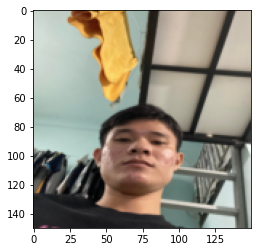

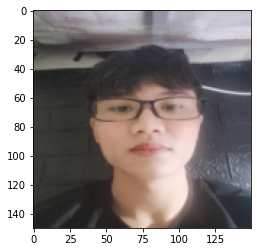

In [3]:
pathdata = '/content/drive/MyDrive/dataAI'
folder = ['duc','huy']
# tai du lieu va dieu chinh size anh
for file in folder:
  path = os.path.join(pathdata,file)
  for picture in os.listdir(path):
    image = imread(os.path.join(path,picture))
    img = resize(image,(150,150))
    plt.imshow(img)
    plt.show()
    break
    break

In [4]:
#tao mang trong 'train' de gan data
train = []

#tao ham 
def train_data():
  for file in folder:
    path = os.path.join(pathdata,file)
    classname = folder.index(file)
    for picture in os.listdir(path):
      image = imread(os.path.join(path,picture))
      img = resize(image,(150,150)) #chuyen kich thuoc anh ve kich thuoc 150,150
      train.append([img,classname])  

train_data()

In [5]:
#tao 2 mang trong de gan du lieu 
mang1=[]
mang2=[]

for features, label in train:
  mang1.append(features)
  mang2.append(label)
  
mang1 = np.array(mang1)
mang2 = np.array(mang2)  

 

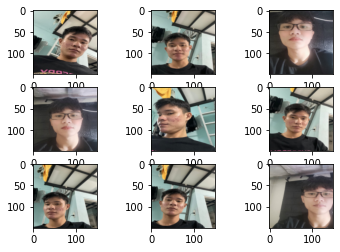

In [6]:
#chia du lieu 70% train, 30%test
x_train, x_test, y_train, y_test = train_test_split(mang1, mang2, test_size = 0.2, shuffle = True, random_state = 1)
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  

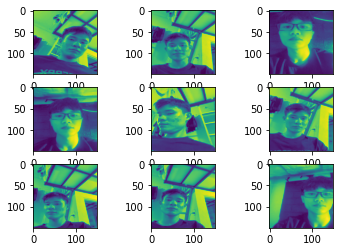

In [7]:
x_train = color.rgb2gray(x_train)
x_test = color.rgb2gray(x_test)
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])

In [8]:
x_train.shape

(52, 150, 150)

In [9]:
x_test.shape

(13, 150, 150)

In [10]:
#dinh hinh lai mang 
x_train = x_train.reshape(52,22500) 
x_test = x_test.reshape(13,22500)
#chuyen du lieu ve kieu float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#xu li du lieu
x_train/= 255.0 
x_test/= 255.0

y_train = to_categorical(y_train,2) 
y_test = to_categorical(y_test,2)

In [11]:
# Model ANN
model = Sequential()
model.add(Dense(64, activation ='relu', input_shape = (22500,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation = 'softmax')) # => Output
model.add(Dropout(0.1))

model.summary()
model.compile( loss='binary_crossentropy', optimizer = Adam(), metrics = ['accuracy']) 
history = model.fit(x_train, y_train, batch_size = 64, epochs = 300, verbose = 1, validation_data = (x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1440064   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 2

In [12]:
#luu model 
model.save('ANN_fashion_mnist.h5')

In [13]:
#danh gia model
score = model.evaluate(x_test, y_test, verbose = 1)

1/1 [==============================] - 0s 24ms/step - loss: 1.3451 - accuracy: 0.7692


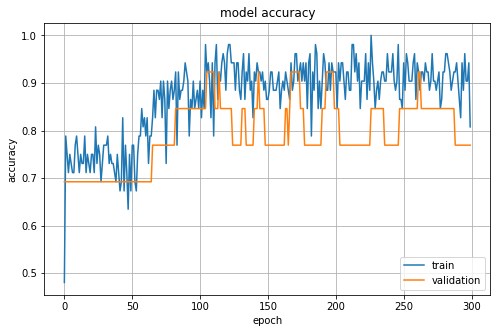

In [17]:
# Graphs of accuracy
plt.figure(figsize=(8,5))
plt.grid(True)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='lower right')
plt.show()

'duc'

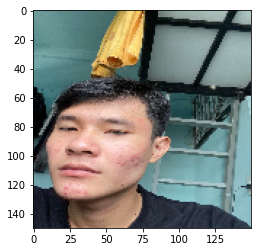

In [19]:
classes = ['duc','khong phai duc']

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

filename='duc2.jpg'

img = load_img(filename, target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = color.rgb2gray(img)
img = img.reshape(1,22500)

label = int(np.argmax(model.predict(img), axis = 1))
classes[label]